<a href="https://colab.research.google.com/github/tantai17132002/thuat_toan_toi_uu_khdl/blob/main/Model_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href = "https://www.facebook.com/tantai.trannguyen.9/" ><img src = "https://scontent.fhan2-3.fna.fbcdn.net/v/t39.30808-6/334157703_124138257262899_2356495393637333625_n.jpg?_nc_cat=111&ccb=1-7&_nc_sid=09cbfe&_nc_ohc=MhIdFWEDzykAX_rYH2v&_nc_ht=scontent.fhan2-3.fna&oh=00_AfAvI0t5uDzNmMRgShT-V7E1jEa3JsXsbkjgURLvN-ZMJg&oe=6468A53A" width = 250, align = "center"></a>

#<center>**THUẬT TOÁN STOCHASTIC GRADIENT DESCENT**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data_shop.csv", encoding = 'utf8', index_col=None)
df.head(5)

,So_khach,So_ao,Gia
0,15,98,14700
1,58,98,56840
2,45,96,43200
3,7,97,6790
4,7,92,6440


Khai thác/Chia tỷ lệ: Vì các cột nằm trên các cột khác nhau nên điều quan trọng là phải thực hiện chia tỷ lệ trên chúng

In [3]:
from sklearn import preprocessing

#Khai thác x,y
x = preprocessing.MinMaxScaler()
y = preprocessing.MinMaxScaler()

tile_X = x.fit_transform(df.drop('Gia', axis='columns'))
tile_y = y.fit_transform(df['Gia'].values.reshape(df.shape[0],1))

In [4]:
tile_X

array([[0.15151515, 0.97802198],
       [0.8030303 , 0.97802198],
       [0.60606061, 0.95604396],
       [0.03030303, 0.96703297],
       [0.03030303, 0.91208791],
       [0.03030303, 1.        ],
       [0.68181818, 0.98901099],
       [0.75757576, 0.97802198],
       [0.25757576, 0.98901099],
       [0.62121212, 0.97802198],
       [0.62121212, 0.86813187],
       [0.33333333, 1.        ],
       [0.33333333, 1.        ],
       [0.60606061, 1.        ],
       [0.1969697 , 0.95604396],
       [0.        , 1.        ],
       [0.53030303, 0.97802198],
       [0.3030303 , 0.96703297],
       [0.3030303 , 0.86813187],
       [0.65151515, 0.96703297],
       [0.65151515, 0.96703297],
       [0.53030303, 0.95604396],
       [0.01515152, 0.95604396],
       [0.63636364, 0.92307692],
       [0.51515152, 0.97802198],
       [0.53030303, 0.86813187],
       [0.31818182, 1.        ],
       [0.54545455, 1.        ],
       [0.53030303, 0.93406593],
       [0.53030303, 0.96703297],
       [0.

In [5]:
tile_y

array([[0.15338346],
       [0.78706767],
       [0.58195489],
       [0.03443609],
       [0.02917293],
       [0.03759398],
       [0.67669173],
       [0.74285714],
       [0.25984962],
       [0.61022556],
       [0.54105263],
       [0.33834586],
       [0.33834586],
       [0.60902256],
       [0.19218045],
       [0.0075188 ],
       [0.52180451],
       [0.29699248],
       [0.26315789],
       [0.6324812 ],
       [0.6324812 ],
       [0.50977444],
       [0.01894737],
       [0.58962406],
       [0.50706767],
       [0.46165414],
       [0.32330827],
       [0.54887218],
       [0.49774436],
       [0.51578947],
       [0.53383459],
       [0.58736842],
       [0.52180451],
       [0.25112782],
       [0.51578947],
       [0.18796992],
       [0.36902256],
       [0.32075188],
       [0.57518797],
       [0.53383459],
       [0.19759398],
       [0.54135338],
       [0.44285714],
       [0.14887218],
       [0.39518797],
       [0.06766917],
       [0.58646617],
       [0.063

Chuyển đổi cột Giá thành mảng một chiều. Nó đã trở thành 2D do mở rộng quy mô đã làm ở trên nhưng bây giờ nên đổi thành 1D




In [6]:
tile_y.reshape(99, )

array([0.15338346, 0.78706767, 0.58195489, 0.03443609, 0.02917293,
       0.03759398, 0.67669173, 0.74285714, 0.25984962, 0.61022556,
       0.54105263, 0.33834586, 0.33834586, 0.60902256, 0.19218045,
       0.0075188 , 0.52180451, 0.29699248, 0.26315789, 0.6324812 ,
       0.6324812 , 0.50977444, 0.01894737, 0.58962406, 0.50706767,
       0.46165414, 0.32330827, 0.54887218, 0.49774436, 0.51578947,
       0.53383459, 0.58736842, 0.52180451, 0.25112782, 0.51578947,
       0.18796992, 0.36902256, 0.32075188, 0.57518797, 0.53383459,
       0.19759398, 0.54135338, 0.44285714, 0.14887218, 0.39518797,
       0.06766917, 0.58646617, 0.06360902, 0.61654135, 0.65413534,
       0.66165414, 0.68421053, 0.12030075, 0.36992481, 0.02255639,
       1.        , 0.47518797, 0.23548872, 0.59398496, 0.65443609,
       0.71729323, 0.54496241, 0.54496241, 0.56090226, 0.27819549,
       0.77443609, 0.23864662, 0.71428571, 0.06015038, 0.06015038,
       0.06015038, 0.06015038, 0.06015038, 0.5118797 , 0.06015

Stochastic Gradient Descent cho phép tìm trọng số (w1,w2,w3) và độ lệch theo phương trình tuyến tính để dự đoán giá áo và sẽ sử dụng mẫu đào tạo đơn lẻ được chọn 
ngẫu nhiên để tính toán lỗi và sử dụng lỗi này, backpropage (truyền ngược) để điều chỉnh trọng số

In [7]:
#Sử dụng thư viện random để chọn mẫu đào tạo ngẫu nhiên
import random
random.randint(0,10) #randit đưa ra số ngẫu nhiên giữa hai số được chỉ định trong đối số

3

In [11]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01): #epochs: điểm tham chiếu
 
    number_of_features = X.shape[1]
    # Mảng numpy có 1 hàng và cột bằng số trong đối tượng 
    # trường hợp này thì number_of_features = 2 (Khach Dat Hang, Ao Trong Kho)
    w = np.ones(shape=(number_of_features)) 
    b = 0 #Độ lệch
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # Chỉ số ngẫu nhiên từ tổng số mẫu
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # ở mỗi lần lặp thứ 100 ghi lại chi phí và giá trị điểm tham chiếu
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(tile_X,tile_y.reshape(tile_y.shape[0],),10000)

In [13]:
#w: hàm mất mát, b: độ lệch, cost: số vòng lặp
w_sgd, b_sgd, cost_sgd

(array([0.78528878, 0.59574163]), -0.47183425022684095, 0.004296719803746572)

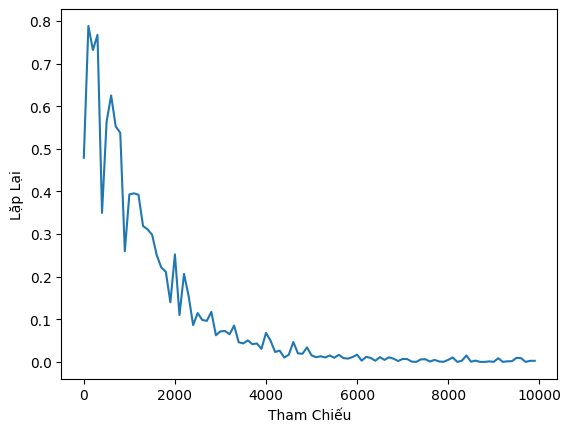

In [ ]:
plt.xlabel("Tham Chiếu")
plt.ylabel("Lặp Lại")
plt.plot(epoch_list_sgd,cost_list_sgd)

Stochastic Gradient Descent chỉ chọn một trường hợp ngẫu nhiên trong tập huấn luyện ở mỗi bước và tính toán độ dốc chỉ dựa trên trường hợp đơn lẻ đó.
Do tính chất ngẫu nhiên, thuật toán này ít thường xuyên giảm nhẹ cho đến khi đạt mức tối thiểu, hàm chi phí sẽ tăng lên và giảm xuống.

In [ ]:
#Tao ham du doan giá áo 
def predict(So_khach, So_ao ,w, b):
    tile_X = x.transform([[So_khach, So_ao]])[0]
    # ở đây w1 = w[0] , w2 = w[1] and độ lệch b
    # tile_X[0] is Khach Dat Hang
    # tile_X[1] is So ao trong kho
    # Công thức tính giá là w1*So Khach dat hang + w2* So Ao Trong Kho + độ lệch 
    tile_price = w[0] * tile_X[0] + w[1] * tile_X[1] + b
    # sau khi nhận được dự đoán về giá, thay đổi quy mô về giá trị ban đầu
    # Cũng vì nó trả về mảng 2D, để nhận được một giá trị thì value[0][0]
    return y.inverse_transform([[tile_price]])[0][0]

In [ ]:
#dự đoán giá áo khi khách đạt hàng là 15, số lượng áo là 100
predict(15,100,w_sgd, b_sgd)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


20606.695855761875